In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import scipy.stats as stats
import statsmodels.api as sm
import plotly.express as px

In [11]:
refugees = pd.read_csv('UNHCR-Data-refugees.csv')
refugees

,Residence,Origin,Year,Refugee Count,UNHCR Assisted 1,Refugee-like count,UNHCR Assisted 2
0,Afghanistan,Iran (Islamic Rep. of),2021,38,38,38,38
1,Afghanistan,Pakistan,2021,72188,123,72188,123
2,Albania,China,2021,14,0,14,0
3,Albania,Egypt,2021,5,0,5,0
4,Albania,Iraq,2021,5,0,5,0
...,...,...,...,...,...,...,...
94370,Zambia,Mozambique,1975,450,0,450,0
94371,Zambia,Namibia,1975,3720,0,3720,0
94372,Zambia,Somalia,1975,110,0,110,0
94373,Zambia,South Africa,1975,760,0,760,0


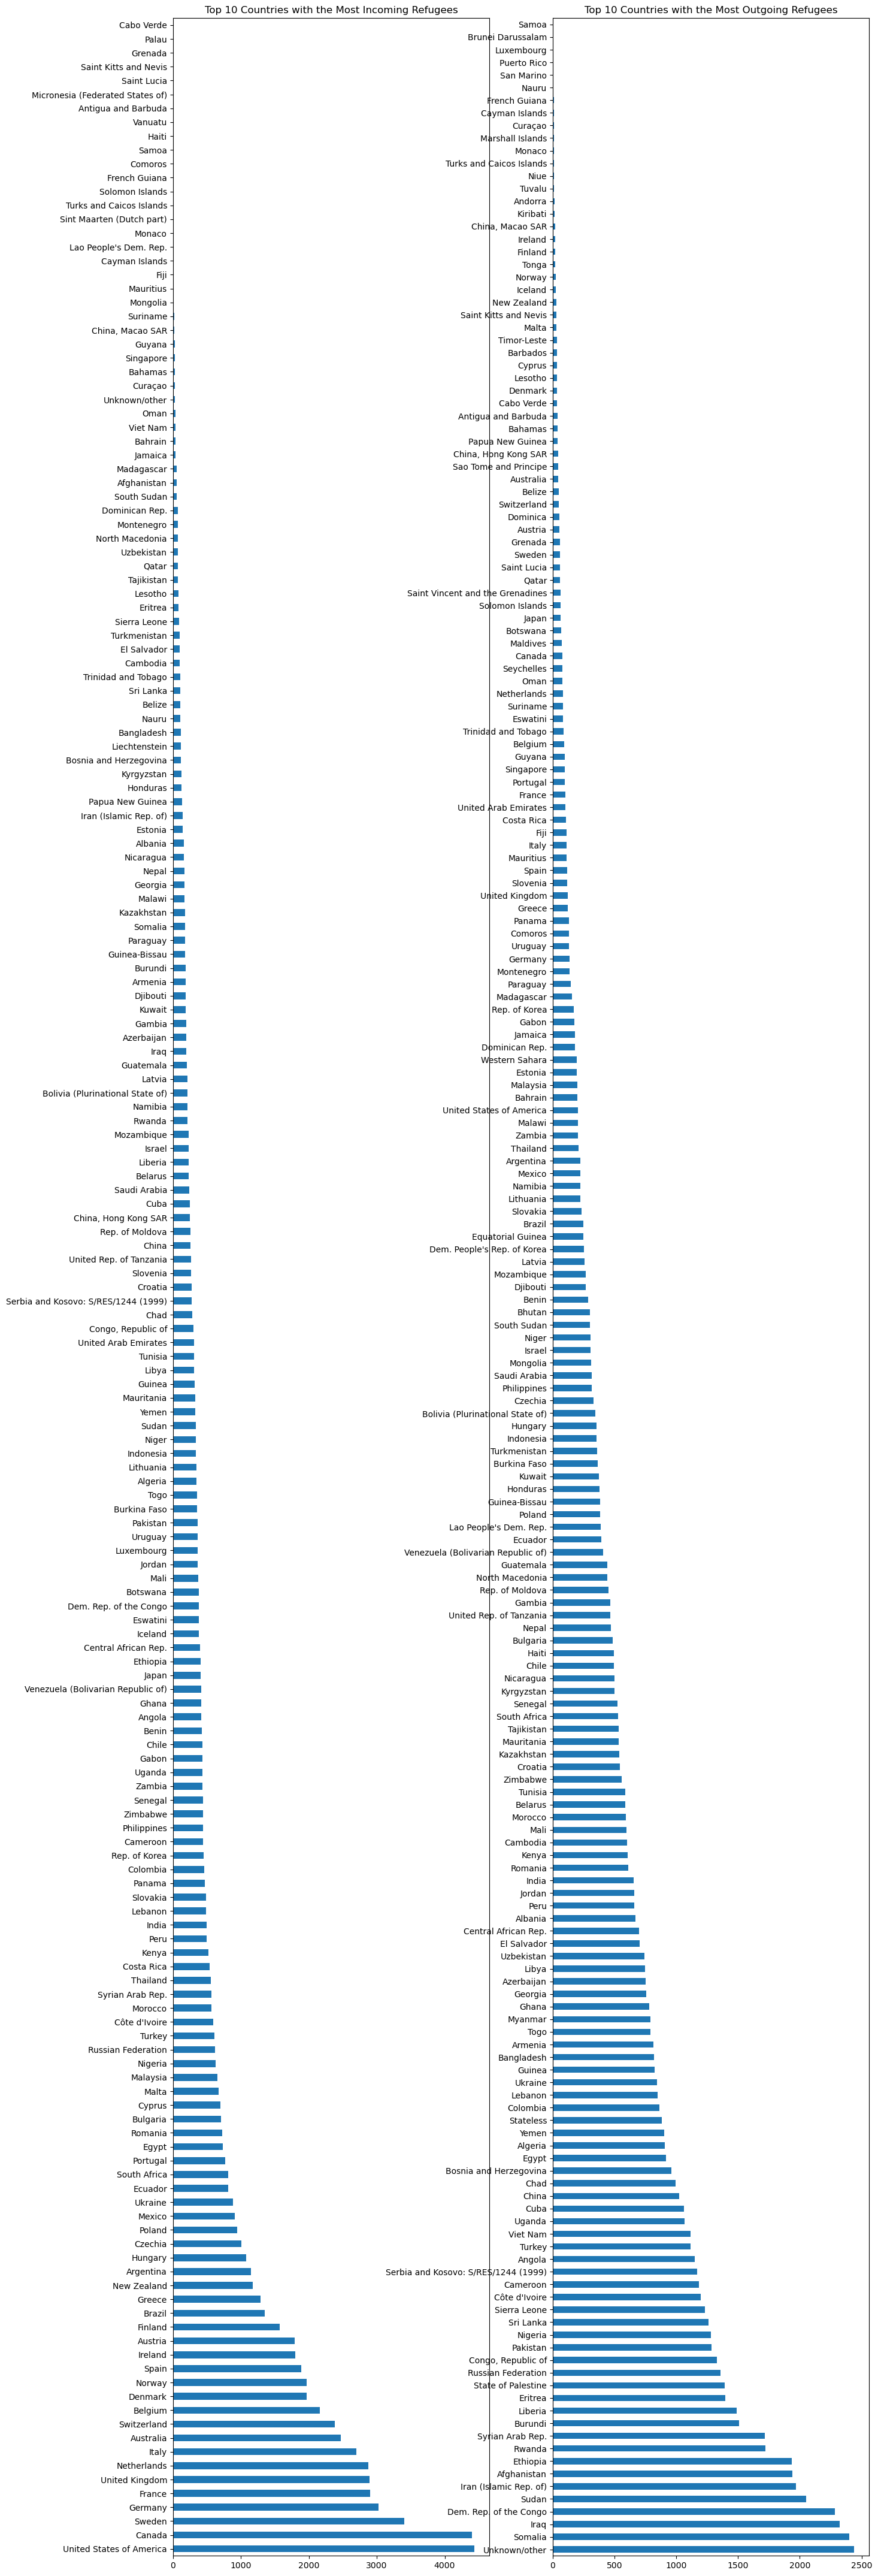

In [12]:
# creating subplots for the top 10 countries with the most outgoing refugees and the top 10 countries with the most incoming refugees
fig, ax = plt.subplots(1, 2, figsize=(15, 55))

# plot the stacked bar of the top 10 countries with the most refugees
ax[0].set_title('Top 10 Countries with the Most Incoming Refugees')
refugees['Residence'].value_counts().plot(kind='barh', ax=ax[0], stacked=True)

# plot the histogram of the top 10 countries with the most outgoing refugees
ax[1].set_title('Top 10 Countries with the Most Outgoing Refugees')
refugees['Origin'].value_counts().plot(kind='barh', ax=ax[1], stacked=True)
plt.show()

In [13]:
# Choropleth map of the top 10 countries with the most refugees using GeoPandas
import geopandas as gpd
import matplotlib.pyplot as plt


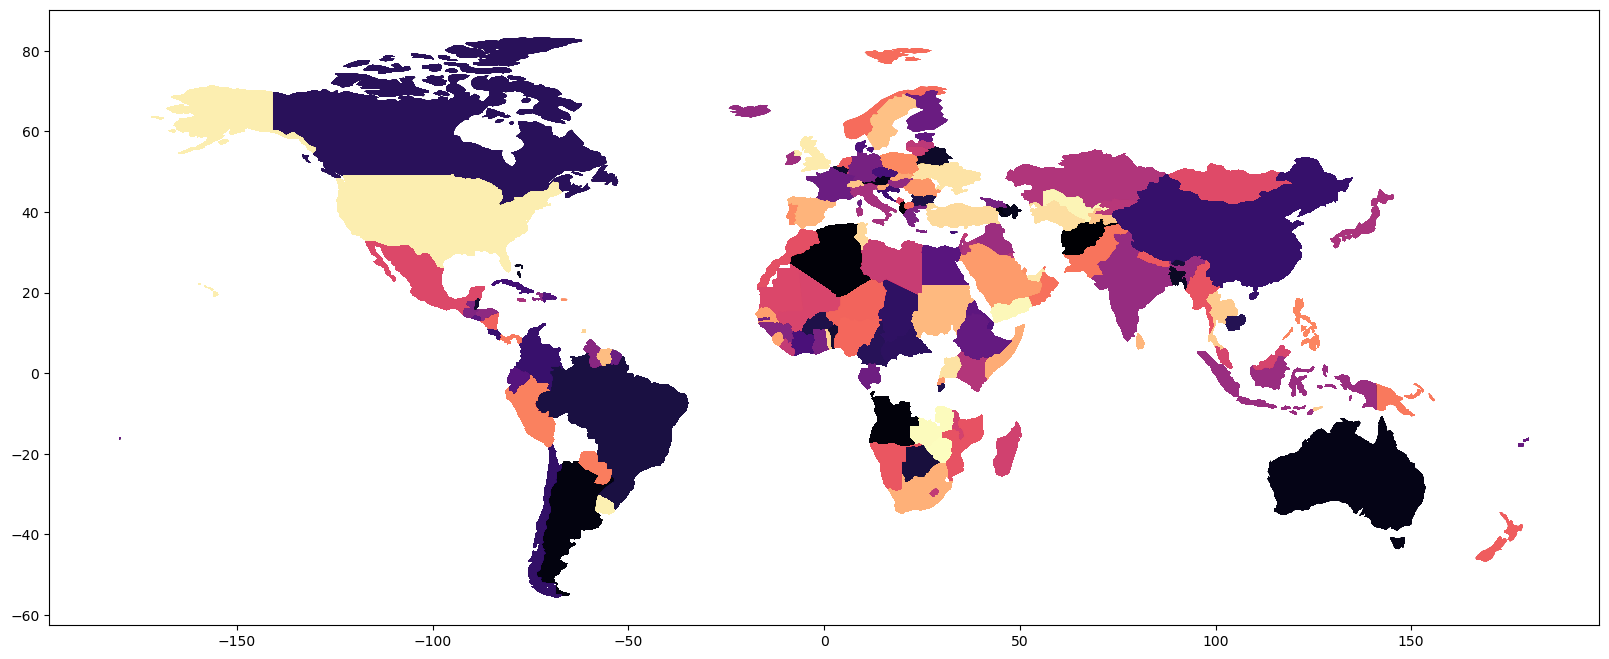

In [14]:
# choropleth map of the top 10 countries with the most refugees using GeoPandas using refugees data
refugees = pd.read_csv('UNHCR-Data-refugees.csv') 
# sort the legend based on refugee count
# plotting based on sorted legend 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world = world.merge(refugees, left_on='name', right_on='Origin')
world.plot(column='Origin', cmap='magma', figsize=(20,15), legend=False)
plt.show()

<AxesSubplot: >

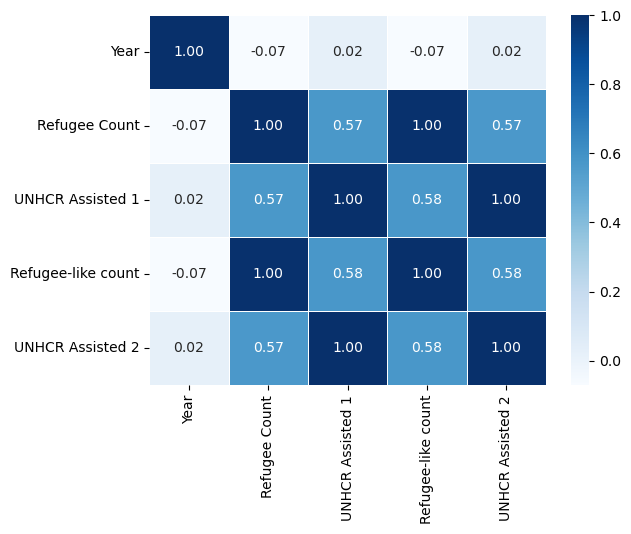

In [15]:
# heatmap of correlation between the top 10 countries with the most refugees
sns.heatmap(data = refugees.corr(numeric_only=True), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [16]:
# group the data by country and year and sum the number of refugees
residence = refugees.set_index(['Residence', 'Year'])
residence.head(50)

Origin  Refugee Count  \
Residence   Year                                                        
Afghanistan 2021                Iran (Islamic Rep. of)             38   
            2021                              Pakistan          72188   
Albania     2021                                 China             14   
            2021                                 Egypt              5   
            2021                                  Iraq              5   
            2021  Serbia and Kosovo: S/RES/1244 (1999)             57   
            2021                    State of Palestine              5   
            2021                      Syrian Arab Rep.             11   
            2021                            Uzbekistan              5   
            2021    Venezuela (Bolivarian Republic of)              5   
Algeria     2021                              Cameroon            128   
            2021                  Central African Rep.             92   
            2021                                  Chad              5   
            2021                         Côte d'Ivoire             77   
            2021                Dem. Rep. of the Congo             68   
            2021                                Guinea             37   
            2021                                  Iraq             14   
            2021                                 Libya             21   
            2021                                  Mali            160   
            2021                                 Niger              8   
            2021                               Nigeria              5   
            2021                    State of Palestine            186   
            2021                                 Sudan             16   
            2021                      Syrian Arab Rep.           6750   
            2021                        Western Sahara          90000   
            2021                                 Yemen            243   
Angola      2021                               Burundi             18   
            2021                  Central African Rep.              7   
            2021                                  Chad            189   
            2021                    Congo, Republic of             65   
            2021                         Côte d'Ivoire            417   
            2021                Dem. Rep. of the Congo          23048   
            2021                               Eritrea             78   
            2021                                Guinea            128   
            2021                         Guinea-Bissau              7   
            2021                               Liberia            164   
            2021                            Mauritania            323   
            2021                                Rwanda            503   
            2021                          Sierra Leone            413   
            2021                               Somalia            271   
            2021                                 Sudan            279   
            2021               United Rep. of Tanzania              5   
            2021                        Western Sahara             16   
Argentina   2021                           Afghanistan             12   
            2021                               Albania             18   
            2021                               Algeria             30   
            2021                                Angola             14   
            2021                               Armenia             77   
            2021                            Bangladesh              5   
            2021      Bolivia (Plurinational State of)             63   

                  UNHCR Assisted 1  Refugee-like count  UNHCR Assisted 2  
Residence   Year                                                          
Afghanistan 2021                38                  38                38  
            2021          

In [17]:
# Creating multi-column index for the origin data
origin = refugees.set_index(['Origin', 'Year'])
origin.reset_index(inplace=True)
origin.head(50)

,Origin,Year,Residence,Refugee Count,UNHCR Assisted 1,Refugee-like count,UNHCR Assisted 2
0,Iran (Islamic Rep. of),2021,Afghanistan,38,38,38,38
1,Pakistan,2021,Afghanistan,72188,123,72188,123
2,China,2021,Albania,14,0,14,0
3,Egypt,2021,Albania,5,0,5,0
4,Iraq,2021,Albania,5,0,5,0
5,Serbia and Kosovo: S/RES/1244 (1999),2021,Albania,57,0,57,0
6,State of Palestine,2021,Albania,5,0,5,0
7,Syrian Arab Rep.,2021,Albania,11,0,11,0
8,Uzbekistan,2021,Albania,5,0,5,0
9,Venezuela (Bolivarian Republic of),2021,Albania,5,0,5,0


In [18]:
# Creating a pivot table for the origin data
origin_pivot = origin.pivot_table(index='Year', columns='Origin', values='Refugee Count', aggfunc='sum')
origin_pivot = origin_pivot.fillna(0)
origin_pivot

Origin,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United States of America,Unknown/other,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1975,0.0,380.0,0.0,0.0,501830.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1920594.0,570.0,0.0,0.0,2110.0,20000.0,0.0,750.0,14720.0
1976,0.0,0.0,0.0,0.0,499190.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2472611.0,1160.0,0.0,0.0,4000.0,35000.0,0.0,750.0,31220.0
1977,0.0,2000.0,0.0,0.0,529830.0,0.0,0.0,440.0,0.0,0.0,...,0.0,2178564.0,0.0,0.0,0.0,14380.0,50000.0,0.0,0.0,76520.0
1978,0.0,1980.0,0.0,0.0,646110.0,0.0,0.0,420.0,0.0,0.0,...,0.0,1847004.0,0.0,0.0,0.0,124210.0,50000.0,15000.0,0.0,163160.0
1979,500000.0,1610.0,0.0,0.0,652980.0,0.0,0.0,700.0,0.0,0.0,...,0.0,1898392.0,0.0,0.0,0.0,397290.0,50000.0,15000.0,1000.0,197640.0
1980,1734921.0,1681.0,0.0,0.0,449030.0,0.0,38.0,333.0,0.0,0.0,...,0.0,1589450.0,24.0,0.0,0.0,346928.0,50000.0,15000.0,1210.0,160.0
1981,3879984.0,1680.0,5.0,0.0,457060.0,0.0,38.0,333.0,0.0,0.0,...,0.0,1680386.0,24.0,0.0,0.0,312548.0,165000.0,0.0,1200.0,190.0
1982,4488214.0,1645.0,5.0,0.0,465890.0,0.0,1019.0,733.0,0.0,0.0,...,0.0,1722228.0,525.0,0.0,0.0,325343.0,165000.0,0.0,1200.0,0.0
1983,4712735.0,1610.0,5.0,0.0,298110.0,0.0,42.0,333.0,0.0,0.0,...,0.0,1857092.0,25.0,0.0,0.0,328399.0,165000.0,0.0,1200.0,3200.0


In [19]:
# mean of the refugee count
mean = origin['Refugee Count'].mean()
print(mean)
# central tendency of the refugee count
origin['Refugee Count'].describe()

6086.839088741722


count    9.437500e+04
mean     6.086839e+03
std      7.039269e+04
min      0.000000e+00
25%      8.000000e+00
50%      3.100000e+01
75%      2.430000e+02
max      3.685839e+06
Name: Refugee Count, dtype: float64

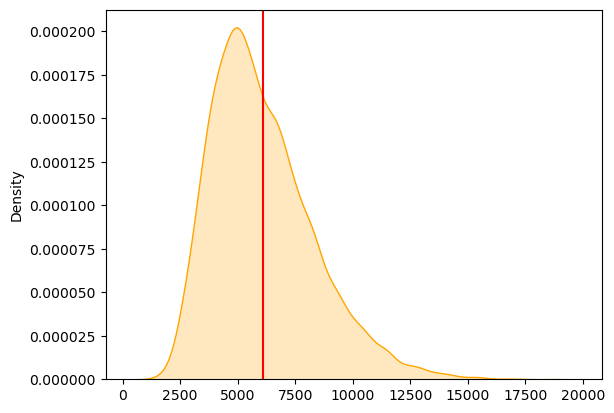

In [20]:
# proving the central limit theorem
# creating a sample of 1000 random numbers from the refugee count
num_samples = 10000
size = 1000
sample_means = []
for i in range(num_samples):
    sample = origin['Refugee Count'].sample(size, replace=True)
    sample_means.append(sample.mean())
mean = origin['Refugee Count'].mean()
sns.kdeplot(sample_means, fill=True, color='orange')
plt.axvline(mean, color='red')
plt.show()

In [21]:
# data without year column
refugees_count = refugees.drop(columns=['Year'])
refugees_count = refugees_count.groupby(['Origin']).sum(numeric_only=True)
refugees_count

,Refugee Count,UNHCR Assisted 1,Refugee-like count,UNHCR Assisted 2
Origin,,,,
Afghanistan,139059404,50834384,142234967,51823048
Albania,338564,369,338564,369
Algeria,195003,2556,195008,2561
Andorra,87,0,87,0
Angola,13054928,1344476,13054928,1344476
...,...,...,...,...
Viet Nam,16457907,940278,16457922,940288
Western Sahara,5767643,2380830,6157643,2406830
Yemen,598084,131933,598120,131969


<AxesSubplot: xlabel='Origin'>

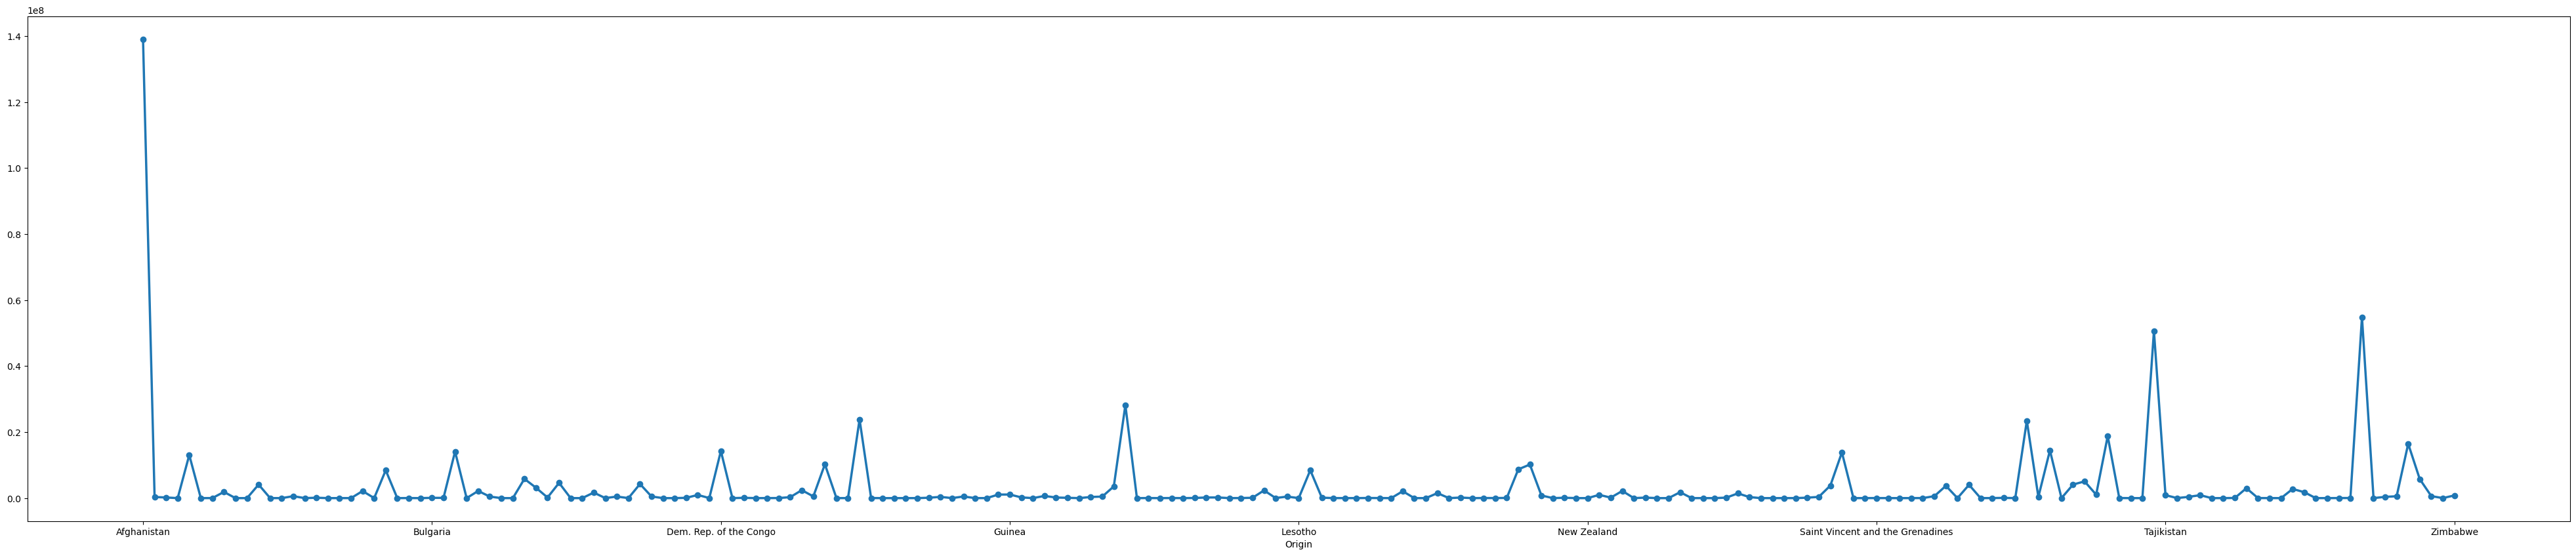

In [22]:
# plotting country with refugee count
refugees_count['Refugee Count'].plot(figsize=(50,10), linewidth=2.5, marker='o')


In [23]:
# add a new column to the dataframe that calculates the percentage of refugees that were assisted
refugees_count['Assisted'] = refugees_count['UNHCR Assisted 2'] / refugees_count['Refugee-like count']*100
refugees_count

,Refugee Count,UNHCR Assisted 1,Refugee-like count,UNHCR Assisted 2,Assisted
Origin,,,,,
Afghanistan,139059404,50834384,142234967,51823048,36.434816
Albania,338564,369,338564,369,0.108990
Algeria,195003,2556,195008,2561,1.313279
Andorra,87,0,87,0,0.000000
Angola,13054928,1344476,13054928,1344476,10.298609
...,...,...,...,...,...
Viet Nam,16457907,940278,16457922,940288,5.713285
Western Sahara,5767643,2380830,6157643,2406830,39.086871
Yemen,598084,131933,598120,131969,22.063967


<AxesSubplot: ylabel='Assisted'>

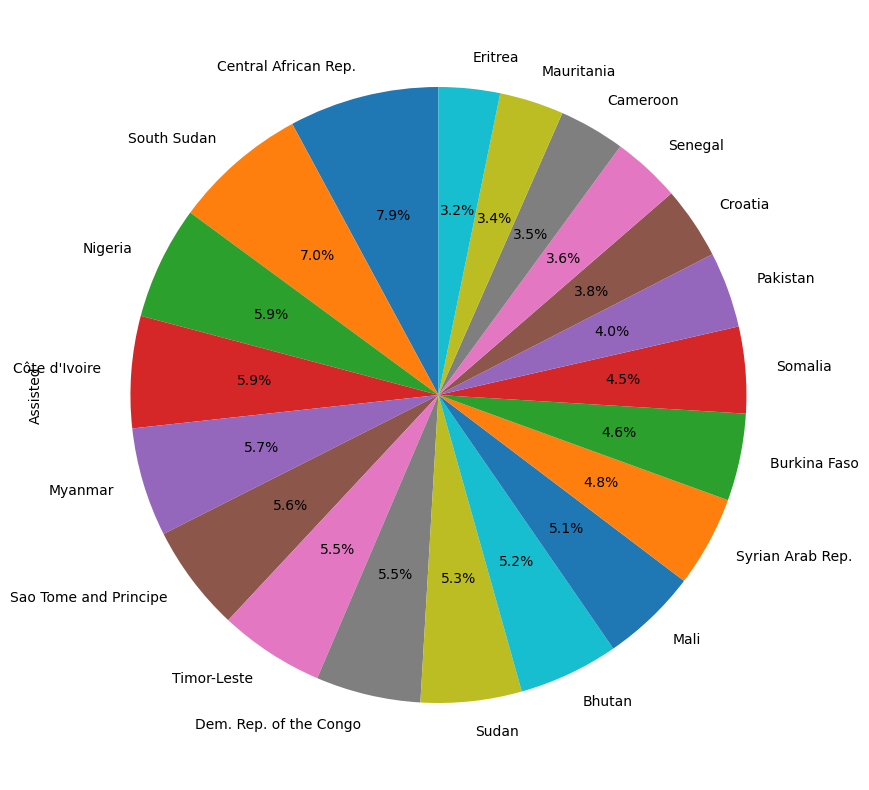

In [24]:
# Pie chart to show the percentage of top 20 refugees that were assisted 
refugees_count['Assisted'].sort_values(ascending=False).head(20).plot(kind='pie', figsize=(10,10), autopct='%1.1f%%', startangle=90)

In [25]:
# finding the top 10 countries with the most refugees
top_10 = refugees_count['Refugee Count'].sort_values(ascending=False).head(10)
top_10

Origin
Afghanistan               139059404
Unknown/other              54830534
Syrian Arab Rep.           50630919
Iraq                       28190407
Ethiopia                   23856081
Somalia                    23443080
Sudan                      18798696
Viet Nam                   16457907
South Sudan                14459246
Dem. Rep. of the Congo     14286819
Name: Refugee Count, dtype: int64

<AxesSubplot: xlabel='Origin'>

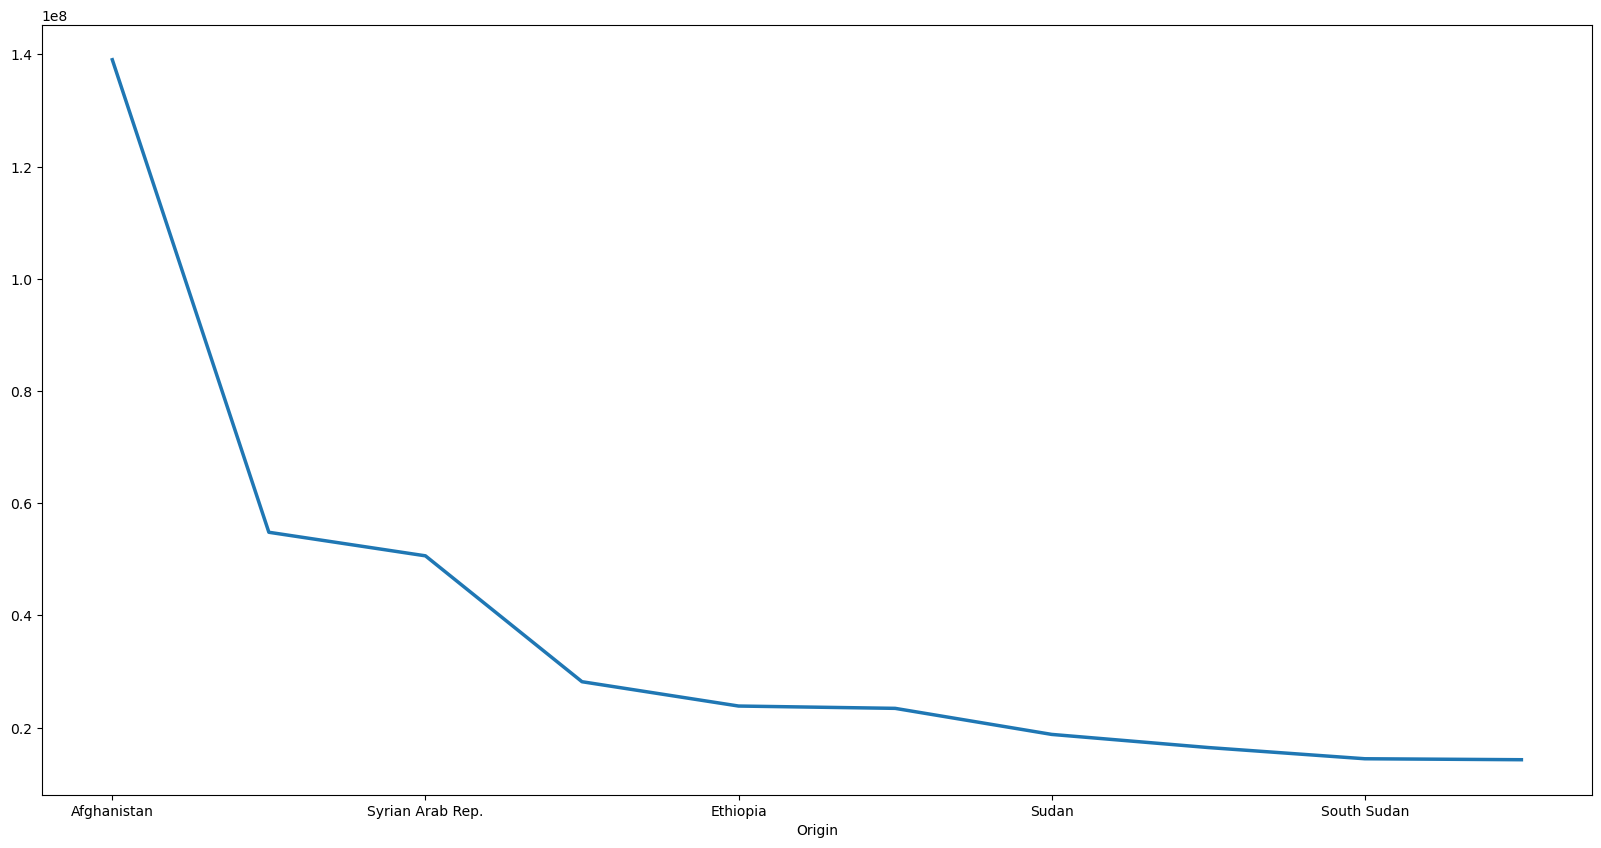

In [26]:
# line plot of the top 10 countries with the most refugees
top_10.plot(figsize=(20,10), linewidth=2.5)

<AxesSubplot: xlabel='Year'>

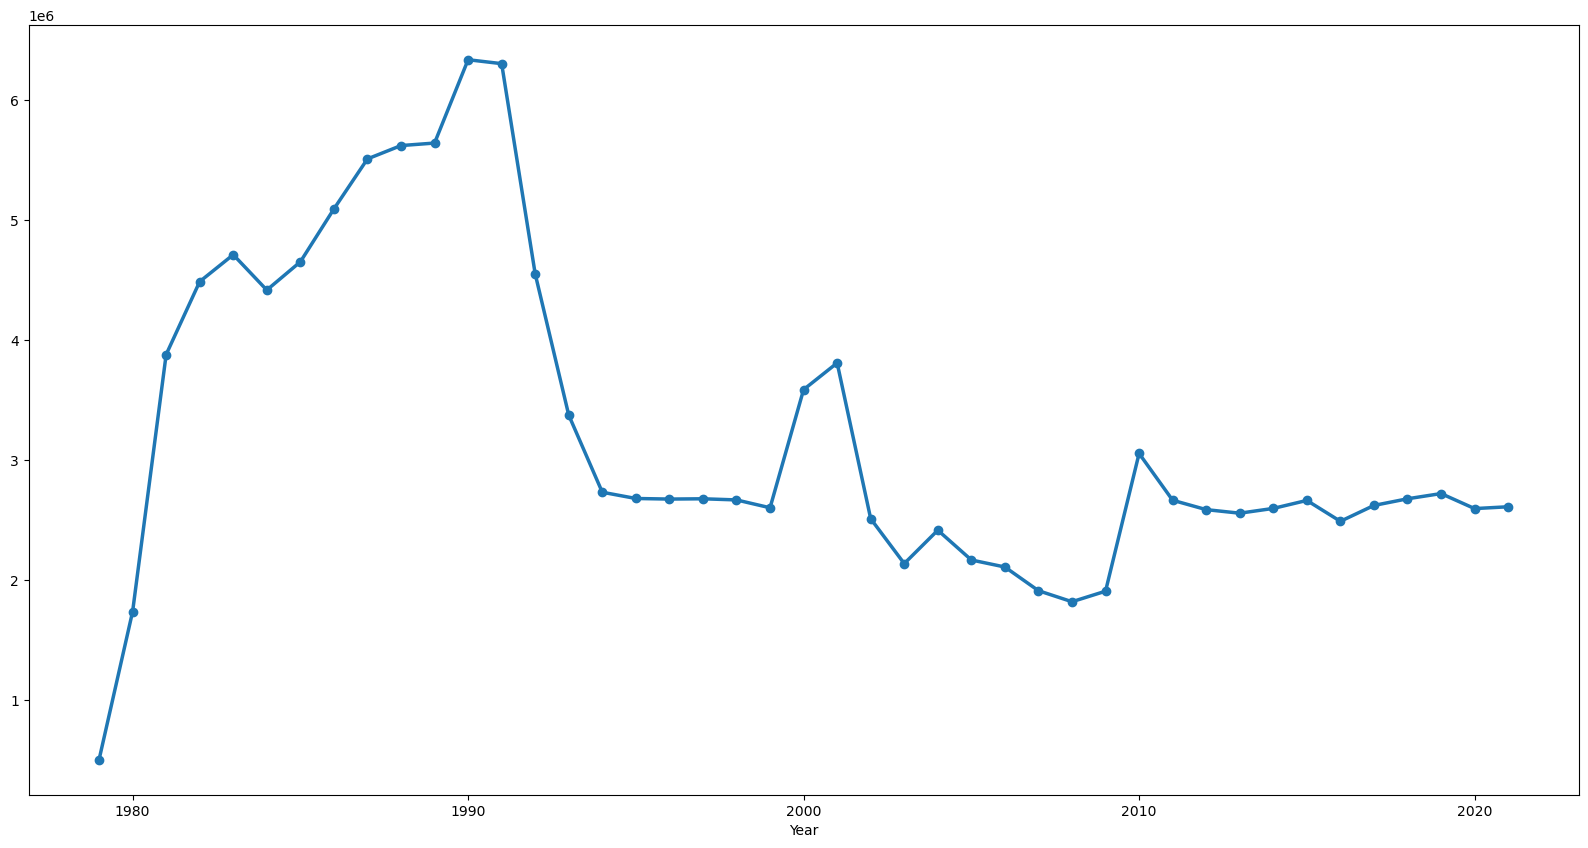

In [27]:
# plotting refugee count for Afghanistan throughout the years
afg = refugees.loc[refugees['Origin'] == 'Afghanistan']
afg = afg.groupby(['Year']).sum(numeric_only=True)
# show points on graph
afg['Refugee Count'].plot(figsize=(20,10), linewidth=2.5, marker='o')

<AxesSubplot: xlabel='Year'>

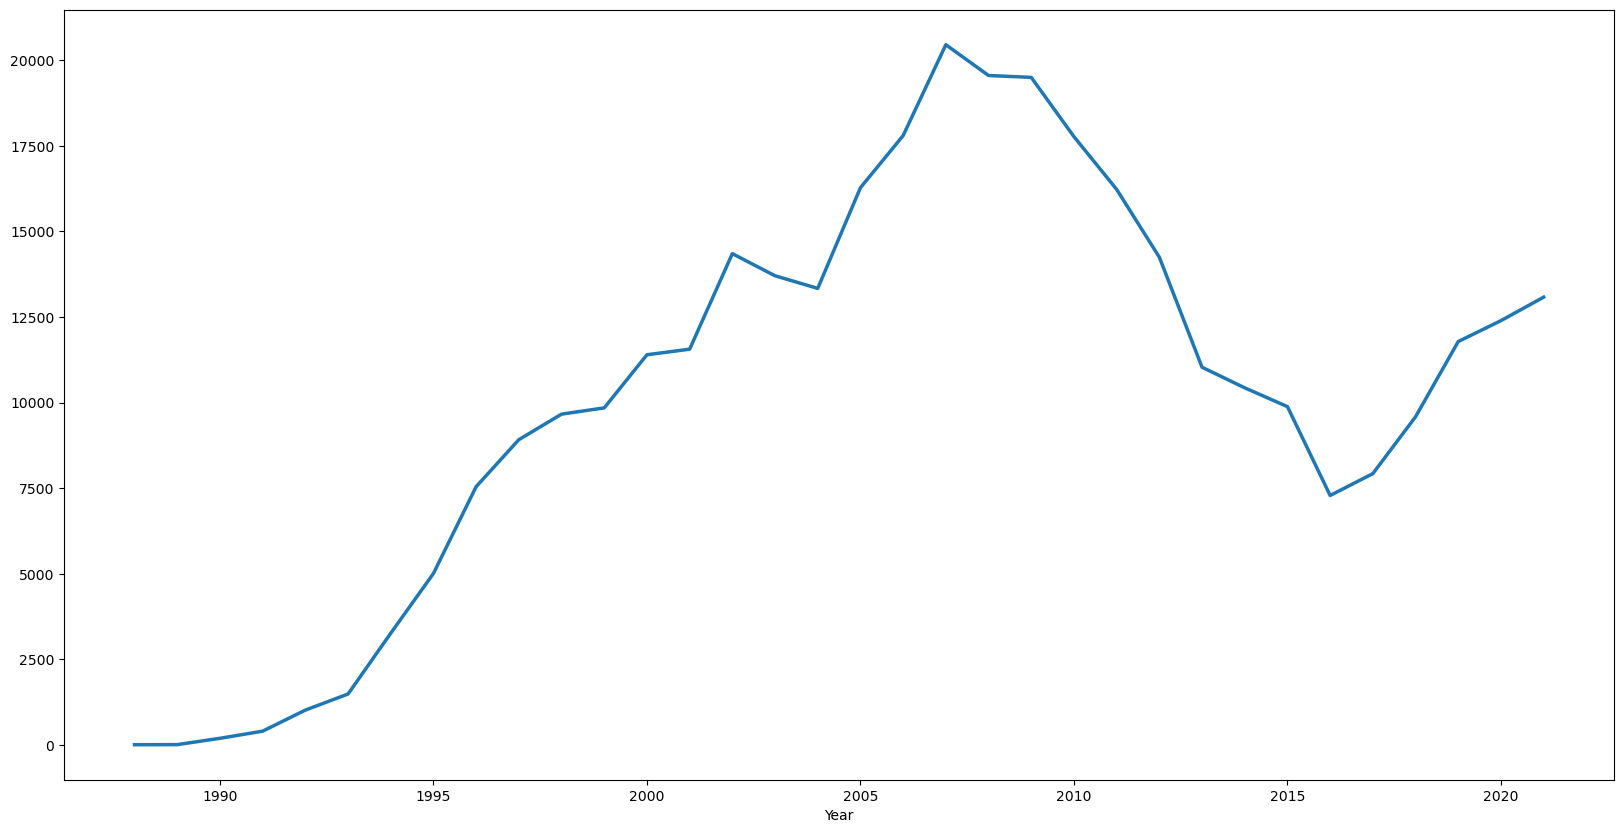

In [28]:
ind = refugees.loc[refugees['Origin'] == 'India']
ind = ind.sort_values(by=['Refugee Count'])
ind = ind.groupby(['Year']).sum(numeric_only=True)
ind['Refugee Count'].plot(figsize=(20,10), linewidth=2.5)

In [29]:
# Refugees data in 2007 in india
ind_2007 = refugees.loc[(refugees['Origin'] == 'India') & (refugees['Year'] == 2007)]
ind_2007 = ind_2007.sort_values(by=['Refugee Count'])
ind_2007

,Residence,Origin,Year,Refugee Count,UNHCR Assisted 1,Refugee-like count,UNHCR Assisted 2
55380,Malaysia,India,2007,0,0,5,0
55114,Ireland,India,2007,5,0,5,0
55885,Portugal,India,2007,5,0,5,0
53831,Belgium,India,2007,5,0,5,0
55846,Poland,India,2007,5,0,5,0
55464,Mexico,India,2007,5,0,5,0
54285,Costa Rica,India,2007,6,6,6,6
54937,Greece,India,2007,6,0,6,0
54582,Finland,India,2007,9,0,9,0
53734,Austria,India,2007,10,0,10,0


In [30]:
# Refugees data in 1990 in Afghanistan
afg_1990 = refugees.loc[(refugees['Origin'] == 'Afghanistan') & (refugees['Year'] == 1990)]
afg_1990 = afg_1990.sort_values(by=['Refugee Count'])
afg_1990

,Residence,Origin,Year,Refugee Count,UNHCR Assisted 1,Refugee-like count,UNHCR Assisted 2
90539,China,Afghanistan,1990,50,0,50,0
90571,Denmark,Afghanistan,1990,192,0,192,0
90879,United Kingdom,Afghanistan,1990,237,0,237,0
90732,Lebanon,Afghanistan,1990,300,0,300,0
90800,Sweden,Afghanistan,1990,378,0,378,0
90673,Italy,Afghanistan,1990,394,0,394,0
90936,United States of America,Afghanistan,1990,11488,0,11488,0
90661,India,Afghanistan,1990,11946,0,11946,0
90669,Iran (Islamic Rep. of),Afghanistan,1990,3061110,0,3061110,0
90766,Pakistan,Afghanistan,1990,3253000,0,3253000,0


<AxesSubplot: xlabel='Year'>

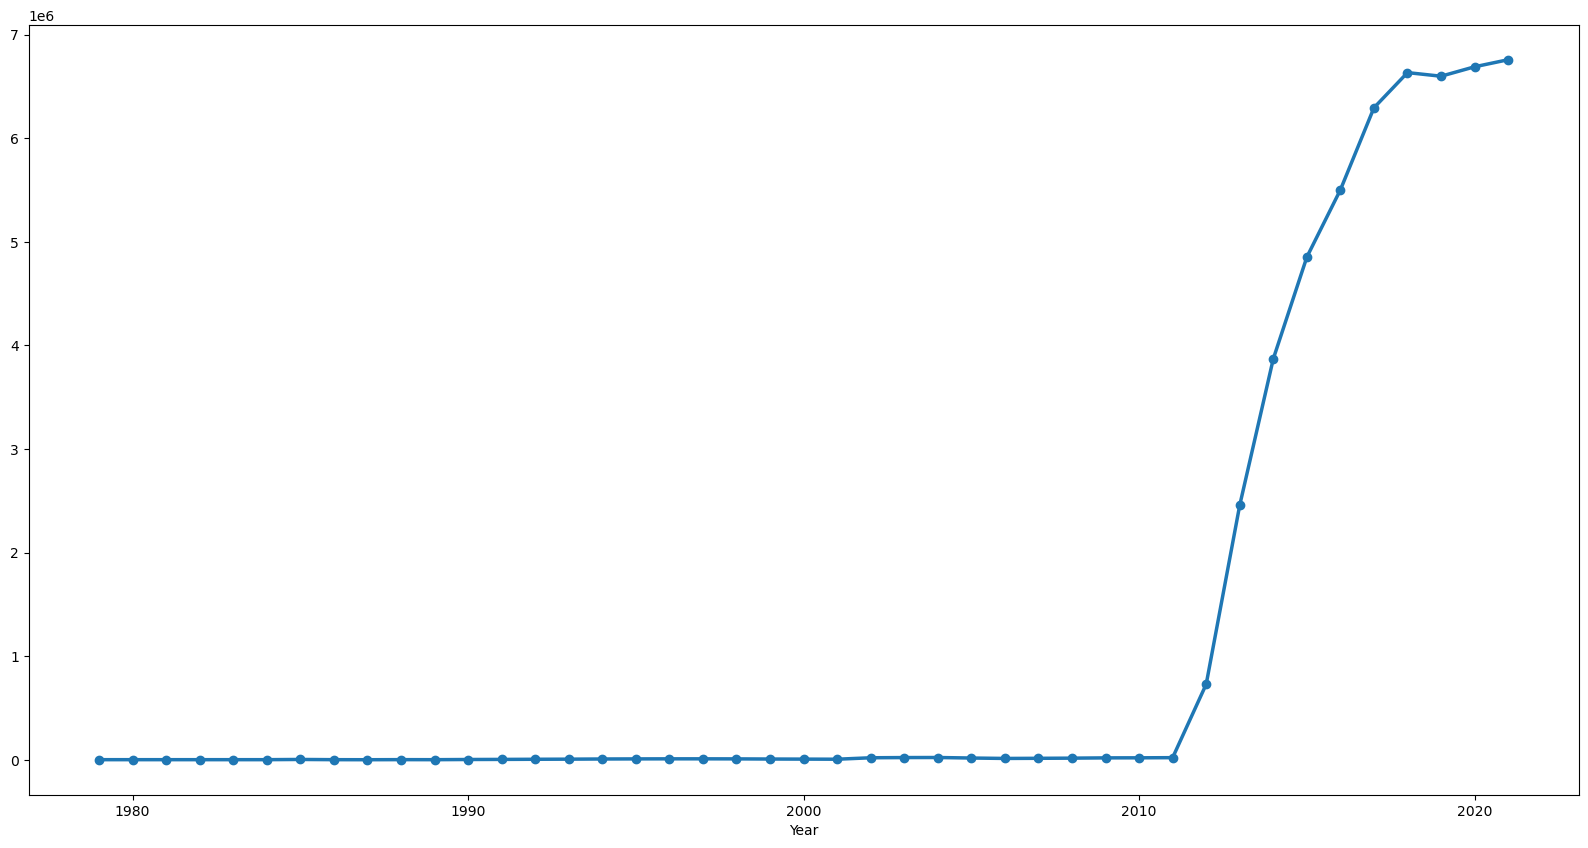

In [31]:
sry = refugees.loc[refugees['Origin'] == 'Syrian Arab Rep.']
sry = sry.sort_values(by=['Refugee Count'])
sry = sry.groupby(['Year']).sum(numeric_only=True)
sry['Refugee Count'].plot(figsize=(20,10), linewidth=2.5, marker='o')

In [32]:
# ANOVA test
# Mean of the refugee count of all the countries from Origin dataframe
country_means = origin['Refugee Count'].groupby(origin['Origin']).mean()
country_std = origin['Refugee Count'].groupby(origin['Origin']).std()

# Creating a datafram with country name, mean and standard deviation
country_stats = pd.DataFrame({'Mean': country_means, 'Std': country_std})

grand_mean = country_stats['Mean'].mean()
print('Grand Mean: ', grand_mean)

# sum of squares between groups
ss_between = sum(201*(country_stats['Mean']-grand_mean)**2) 
print('SS_between: ', ss_between)

# sum of squares within groups
ss_within = (country_stats['Std']**2).sum()
print('SS_within: ', ss_within)

# degrees of freedom between groups
df_between = 201-1
print('df_between: ', df_between)

# degrees of freedom within groups
df_within = 201*(201-1)
print('df_within: ', df_within)

# mean square between groups
ms_between = ss_between/df_between
print('MS_between: ', ms_between)

# mean square within groups
ms_within = ss_within/df_within
print('MS_within: ', ms_within)

# F-statistic
f_stat = ms_between/ms_within
print('F-statistic: ', f_stat)

# p-value = P(F > f_stat)
p_value = 1 - stats.f.cdf(f_stat, df_between, df_within)
print('p-value: ', p_value)

Grand Mean:  2545.4843394919144
SS_between:  2304851221119.0337
SS_within:  294313254818.12946
df_between:  200
df_within:  40200
MS_between:  11524256105.59517
MS_within:  7321225.244232076
F-statistic:  1574.088451202125
p-value:  1.1102230246251565e-16


In [33]:
# top 10 countires from country_stats
top_10_stats = country_stats.sort_values(by=['Mean'], ascending=False).head(10)
top_10_stats

,Mean,Std
Origin,,
Afghanistan,71643.175683,358278.016303
South Sudan,48037.362126,165934.997845
Mozambique,32777.981203,134297.908766
Western Sahara,30039.807292,57408.515763
Syrian Arab Rep.,29453.705061,234939.972021
Unknown/other,22471.530328,94735.428444
Viet Nam,14773.704668,58050.864423
Myanmar,12880.740506,74416.056570
Ethiopia,12328.724031,90607.290024


In [35]:
# Tree map of the top 10 countries with the most refugees on origin dataframe
fig = px.treemap(origin, path=['Origin', 'Year'], values='Refugee Count', title='Top 10 Countries with the Most Refugees')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed